# Introducing BDDs

## Boolean formulas and valuations
As shortly discussed in the course, transitions of automata in SPOT are labelled with Boolean formulas over atomic propositions.

The atomic propositions correspond (Boolean) properties of your model, for instance whether the light is on (light_on), we leave the room (leave_room) etc.

Note that every Boolean formula can also be expressed as the set of valuations respecting it.
(We call a valuation the assignment of every proposition to true or false, this is also called a minterm)

For instance given we the set of atomic propositions AP = {a, b}, then all possible valuations are
{ab, a!b, !ab, !a!b}.
The Boolean formula f = a xor b then naturally corresponds to the set of valuations {a!b, !ab}.

So our alphabet $\Sigma$ corresponds to the set of all subsets over the valuations $2^{AP}$, with the special symbol T to denote all valuations.

Note that the empty set is excluded, as such a transition could never be taken and is therefore "useless".

## BDDs

A canonical way to describe and work with such sets of valuations are Binary Decision Diagrams (BDDs).

They have proven very effective in practice and allow for all necessary operations.

In [1]:
from AAA_utils import *

In [2]:
# Create atomic propositions
leave_room = make_ap("leave_room")
light_on = make_ap("light_on")

## Example formula
We want to express that when we leave the room the light is off

In [3]:
f = buddy.bdd_imp(leave_room, buddy.bdd_not(light_on)) # bdd_imp: Logical implication
f

<buddy.bdd; proxy of <Swig Object of type 'bdd *' at 0x7f511895a190> >

This output is not very helpful, let us try something else

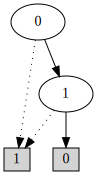

In [4]:
show_bdd(f)

What do we see here? How to interpret this?

In [6]:
# every proposition has an internal number:
print("leave_room: ", buddy.bdd_var(leave_room))
print("light_on: ", buddy.bdd_var(light_on))
# Dashed lines indicate that the proposition evaluates to F, solid lines to T
# All paths through the DAG that end up at 1 are accepted valuations

leave_room:  0
light_on:  1


More complicated functions

In [7]:
x = make_ap("x")
y = make_ap("y")
z = make_ap("z")

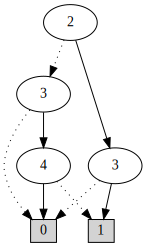

In [8]:
# Here not all paths involve all variables
f = x&y | y&buddy.bdd_not(z)
show_bdd(f)

BDDs express constraints over the atomic propositions, however they can only do so for the current instant.

If we want to have a qualitative notion of time like:

*After leaving the room, the light needs to be turned off*

we need automata.

Taking a transition in the automaton correspond to "1 time unit passed".

Spot is mainly concerned with $omega$-automata, that is we are interested in infinitely long runs.

A large variety of accepting conditions is supported from T (accepting all infinite runs), F(accepts no runs), Büchi (accept all runs visiting a colored transition infinitely often), co-Büchi (accept all infinite runs visiting a colored transition finitely often), ..., transition based Emerson-Lei (boolean formula with Inf and Fin of colors)

Let's construct some logical statement

In [18]:
aut = spot.make_twa_graph() # A new automaton, accepting all runs, with zero states and propositions
# aut can not show yet, printing fails without a state

In [19]:
# Add propositions
leave_room = buddy.bdd_ithvar(aut.register_ap("leave_room"))
light_on = buddy.bdd_ithvar(aut.register_ap("light_on"))

In [20]:
# We need three states
s1 = aut.new_state() # In the room
s2 = aut.new_state() # Just the left the room
s3 = aut.new_state() # Lights are off

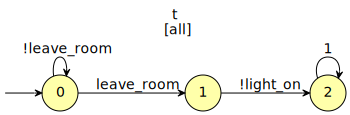

In [21]:
# Add the transitions
# As long as we do not leave the room we do not care about the light
aut.new_edge(s1, s1, buddy.bdd_not(leave_room))
# We leave
aut.new_edge(s1, s2, leave_room)
# Turn off the light
aut.new_edge(s2, s3, buddy.bdd_not(light_on))
# Afterwards we do not care about what happens
aut.new_edge(s3, s3, buddy.bddtrue)
# Or maybe we do? Put your own logic here:

aut.show()

## A note on determinism

In the "textbook" automata definition (With $\Sigma$ being a finite set of symbols, called a letter), the definition for an
automaton being deterministic is straight forward:

For any source state and letter there is AT MOST a single successor.

How can this definition be adapted to our setting?
Can you write a function to check if a given state in an automaton is deterministic?

In [22]:
# Each edge has a propoerty called cond, which is the condition when the edge can be taken given as BDD
def is_deterministic(aut:spot.twa_graph, state:int):
  # You can loop over outgoing transitions like this:
  for e in aut.out(state):
    pass

## Your turn

(atomic propositions are boldfaced)

Construct an automaton which expresses the following behaviour:
A machine is **idle** until a **button** is pressed in which case it starts **working**.
When the machine is **working**, pressing the **button** may or may not cause it to return
to **idle** again.

In [23]:
machine_model = spot.make_twa_graph()
# Your code here

Is this machine deterministic?
Use your function is_deterministic to check it

In [24]:
# Your code here

In [ ]:
# If it is not deterministic, maybe you can with the postprocessor
pp = spot.postprocessor()
# Set the options, see https://spot.lre.epita.fr/doxygen/classspot_1_1postprocessor.html